In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint, uniform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-performance-prediction/train_dataset.csv
/kaggle/input/employee-performance-prediction/test_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/employee-performance-prediction/train_dataset.csv")

In [3]:
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [6]:
df.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [7]:
df.isna().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

Filling Missing Values

In [8]:
df['wip']=df['wip'].fillna(df['wip'].mean())

In [9]:
df.isna().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='actual_productivity', ylabel='Count'>

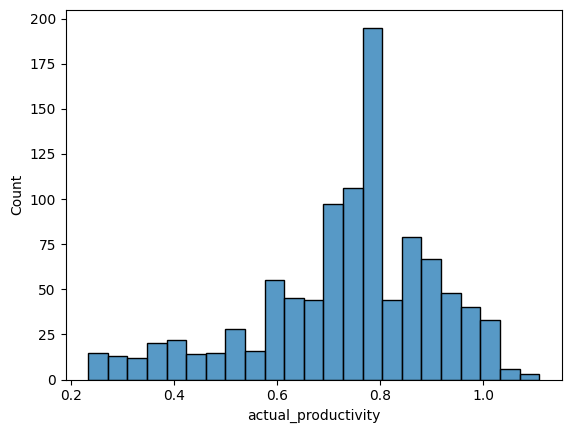

In [11]:
sns.histplot(data=df['actual_productivity'],kde=False)

<Axes: >

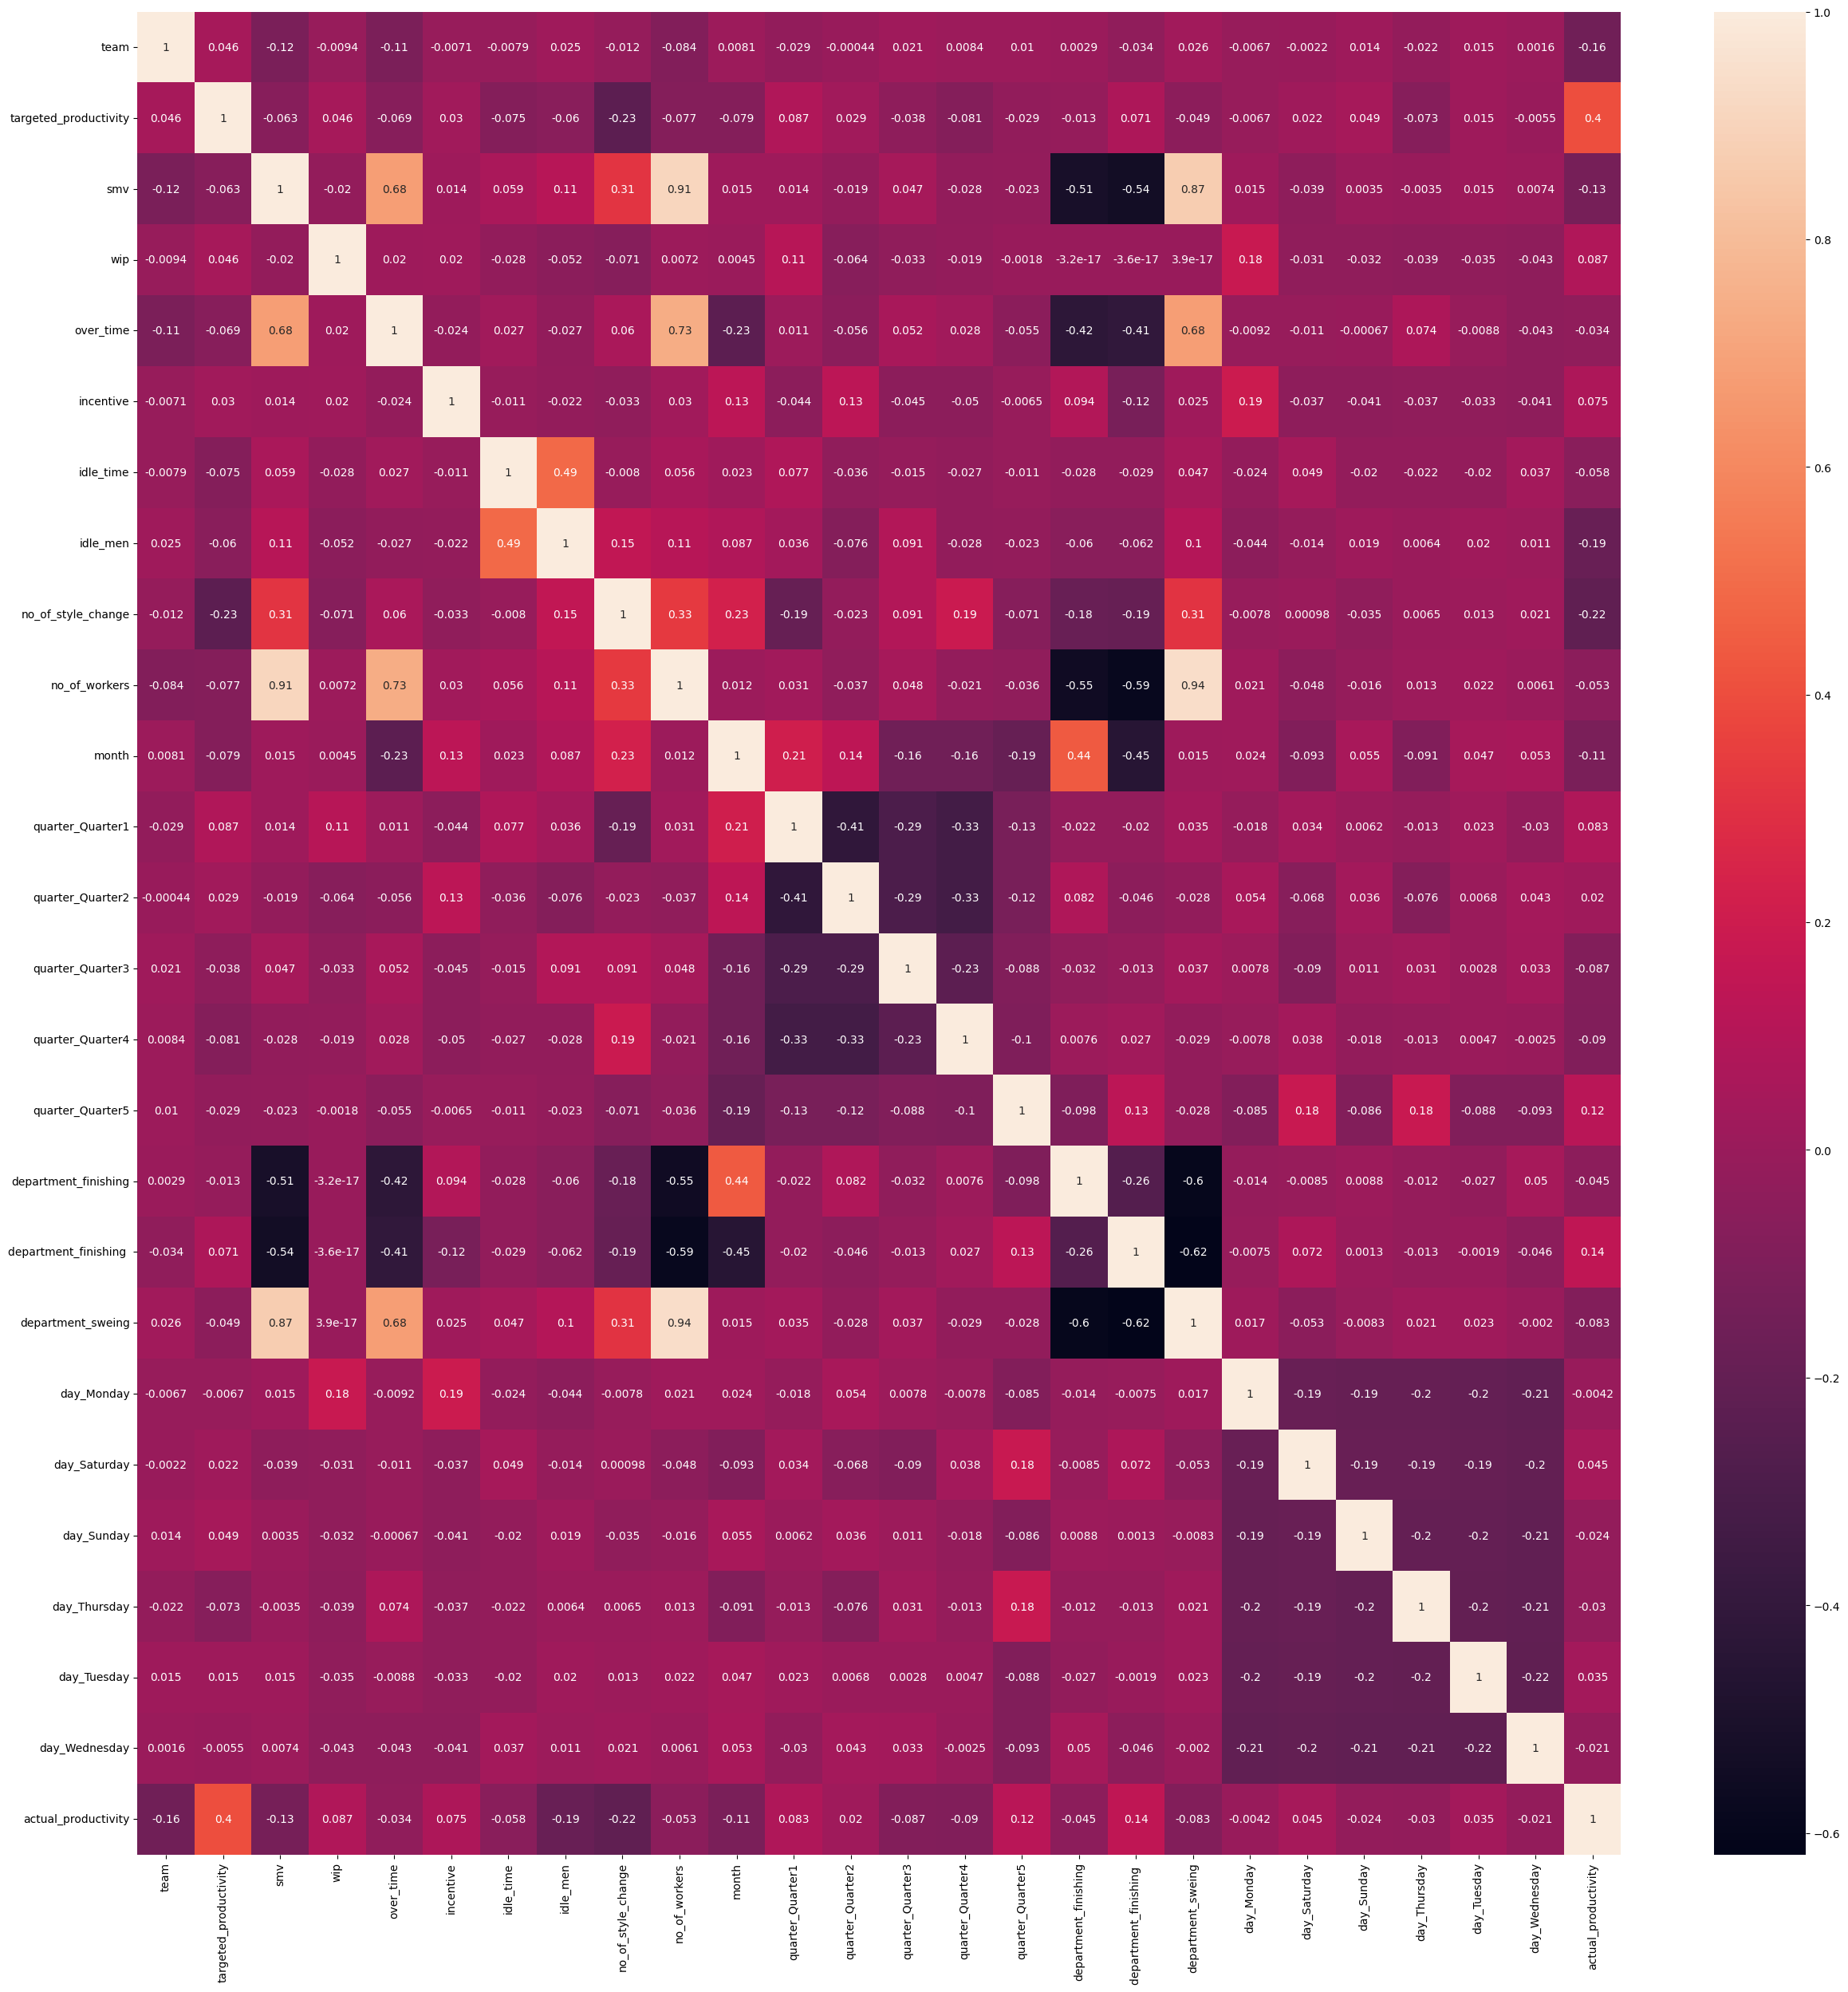

In [12]:
corr_matrix=df.corr()
fig,ax= plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,ax=ax)

In [13]:
sorted_mat = corr_matrix.unstack().sort_values()
pd.set_option('display.max_rows', None) 
sorted_mat.tail(100)

actual_productivity    quarter_Quarter1         0.082608
quarter_Quarter1       actual_productivity      0.082608
month                  idle_men                 0.086587
idle_men               month                    0.086587
quarter_Quarter1       targeted_productivity    0.086722
targeted_productivity  quarter_Quarter1         0.086722
actual_productivity    wip                      0.087362
wip                    actual_productivity      0.087362
idle_men               quarter_Quarter3         0.090700
quarter_Quarter3       idle_men                 0.090700
no_of_style_change     quarter_Quarter3         0.090840
quarter_Quarter3       no_of_style_change       0.090840
department_finishing   incentive                0.094254
incentive              department_finishing     0.094254
idle_men               department_sweing        0.100313
department_sweing      idle_men                 0.100313
wip                    quarter_Quarter1         0.108699
quarter_Quarter1       wip     

In [14]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target variable
corr_matrix_with_target = df.corr()['targeted_productivity'].sort_values(ascending=False)

# Display the correlation matrix with the target variable
print(corr_matrix_with_target)

targeted_productivity    1.000000
actual_productivity      0.401069
quarter_Quarter1         0.086722
department_finishing     0.071316
day_Sunday               0.049497
team                     0.046141
wip                      0.046083
incentive                0.030013
quarter_Quarter2         0.029283
day_Saturday             0.022040
day_Tuesday              0.014753
day_Wednesday           -0.005486
day_Monday              -0.006663
department_finishing    -0.012671
quarter_Quarter5        -0.029008
quarter_Quarter3        -0.038159
department_sweing       -0.049064
idle_men                -0.060166
smv                     -0.063188
over_time               -0.068724
day_Thursday            -0.073327
idle_time               -0.075447
no_of_workers           -0.076844
month                   -0.079258
quarter_Quarter4        -0.081283
no_of_style_change      -0.228722
Name: targeted_productivity, dtype: float64


In [15]:
x=df.drop(columns='targeted_productivity')
y=df['targeted_productivity']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
#hyperparameter tuning
parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2']
}

regressor=DecisionTreeRegressor()

In [19]:
from sklearn.model_selection import GridSearchCV
regressorCV=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')

In [20]:
regressorCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [21]:
regressorCV.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [22]:
y_pred=regressorCV.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [24]:
score

-4.922350106447223

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
r_pred=rf.predict(x_test)

In [26]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,r_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, r_pred)))
print("R2 Score",metrics.r2_score(y_test,r_pred))

MAE 0.04665089285714323
RMSE 0.08303124286475942
R2 Score 0.24755602321158066


In [27]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize a weak regressor (decision tree in this case)
weak_regressor = DecisionTreeRegressor(max_depth=3)

# Initialize AdaBoost regressor with the weak regressor
adaboost_regressor = AdaBoostRegressor(estimator=weak_regressor, n_estimators=50, random_state=42)

# Train the AdaBoost regressor
adaboost_regressor.fit(x_train, y_train)

# Make predictions on the test set
ada_pred = adaboost_regressor.predict(x_test)

In [28]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,ada_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, ada_pred)))
print("R2 Score",metrics.r2_score(y_test,ada_pred))

MAE 0.07677129463862543
RMSE 0.09784355922538913
R2 Score -0.044853922788197664


In [29]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_regressor,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = random_search.best_estimator_
xgb_pred = best_model.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'colsample_bytree': 0.6624074561769746, 'learning_rate': 0.05679835610086079, 'max_depth': 5, 'n_estimators': 137, 'subsample': 0.7334834444556088}


In [30]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,xgb_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print("R2 Score",metrics.r2_score(y_test,xgb_pred))

MAE 0.04388559504988649
RMSE 0.07496946646201286
R2 Score 0.386577173565379
